In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import apriltag
import skimage as ski
from skimage.morphology import erosion, square, dilation, binary_dilation, binary_erosion, disk
import cv2
import time

In [2]:
def show_image(image, title="Image"):
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

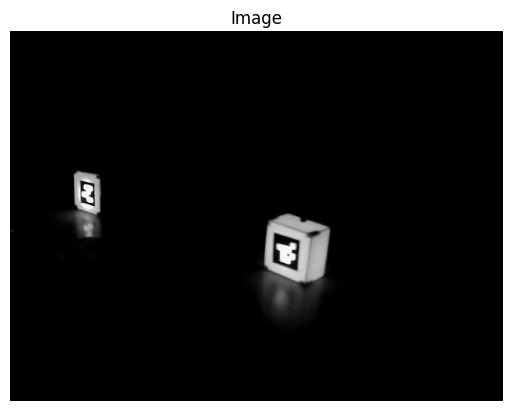

In [3]:
image = ski.io.imread('samples/frame16.png')
image = ski.color.rgb2gray(image)

show_image(image)

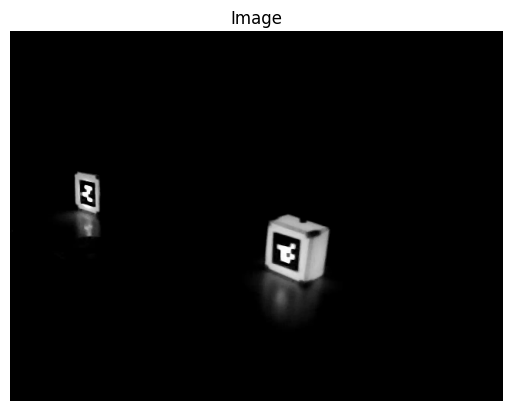

In [4]:
# erosion

image = erosion(image, square(3))

show_image(image)

In [5]:
 #image = (image > 0.5) * 1.0
 #image = binary_erosion(image, square(3))
 #image = binary_dilation(image, square(3))

 #show_image(image)

In [6]:
# colorize background

#labeled_image = ski.measure.label(np.invert(image), connectivity=2, return_num=False)
#groups_count, _ = np.histogram(labeled_image.flatten(), range(np.max(labeled_image) + 2))

#image[labeled_image == groups_count.argmax()] = 1.0

#show_image(image)

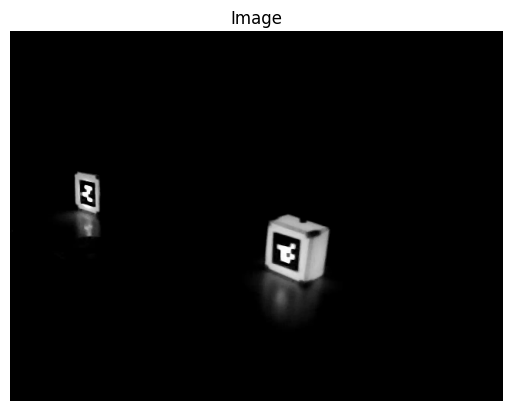

In [7]:
scale = 9
#temp = cv2.resize(image * 1.0, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_NEAREST_EXACT)

#image = cv2.resize(temp, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_NEAREST_EXACT)


# Initialize output image
#image = cv2.resize(temp, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_NEAREST_EXACT)

show_image(image)

In [8]:
print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)
results = detector.detect(np.asarray(image * 255, np.uint8))
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 2 total AprilTags detected


In [9]:
def detect_apriltags(image, detector):
    """Run AprilTag detection and return number of tags detected."""
    results = detector.detect(np.asarray(image * 255, np.uint8))
    return len(results)

In [21]:
def edge_preservation_score(original, eroded):
    # Apply Sobel filter to detect edges
    original_edges = sobel(original)
    eroded_edges = sobel(eroded)
    
    # Calculate similarity between original and eroded edge maps
    score = np.sum((original_edges - eroded_edges) ** 2)  # Mean squared error for edge preservation
    return score

In [22]:
def contrast_loss(original, eroded):
    original_contrast = np.std(original)  # Standard deviation as a contrast measure
    eroded_contrast = np.std(eroded)
    return original_contrast - eroded_contrast

In [10]:
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)

# Define structuring elements and sizes for performance tests
erosion_methods = {
    "Square 3x3": square(3),
    "Square 5x5": square(5),
    "Disk 3": disk(3),
    "Disk 5": disk(5)
}

# Store results
performance_results = []

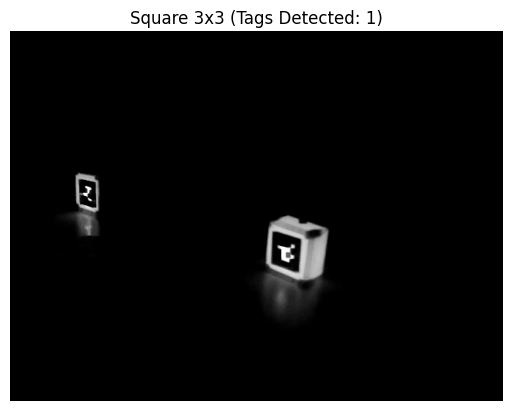

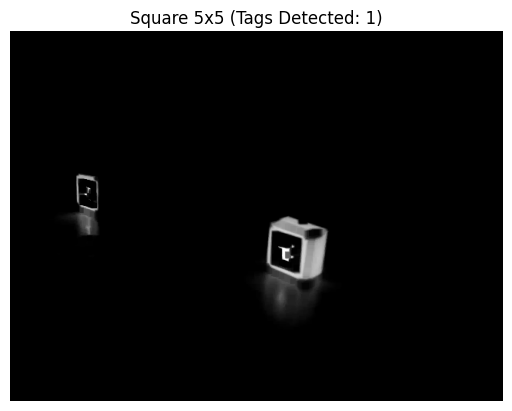

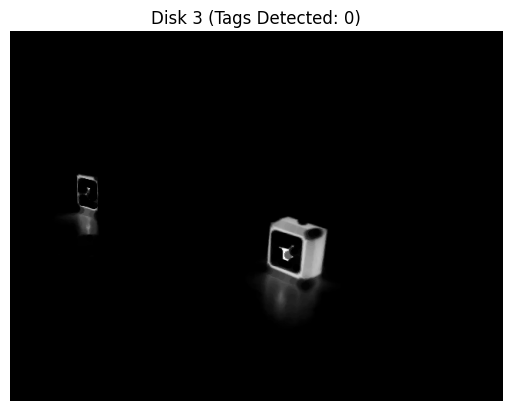

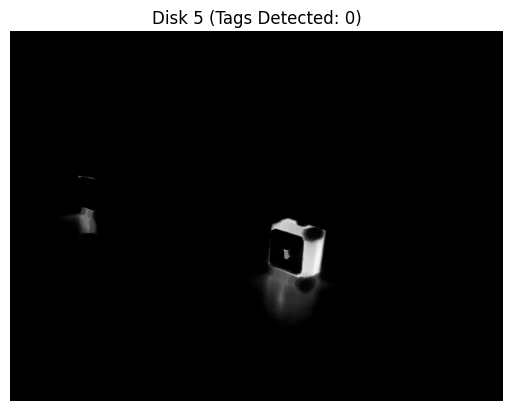

In [11]:
for method_name, struct_elem in erosion_methods.items():
    # Measure time to perform erosion
    start_time = time.time()
    eroded_image = erosion(image, struct_elem)
    elapsed_time = time.time() - start_time

    # Run AprilTag detection
    tag_count = detect_apriltags(eroded_image, detector)
    
    # Store results
    performance_results.append({
        "Method": method_name,
        "Execution Time (s)": elapsed_time,
        "AprilTags Detected": tag_count
    })

    # Show eroded image
    show_image(eroded_image, title=f"{method_name} (Tags Detected: {tag_count})")

In [12]:
print("Performance Results:")
for result in performance_results:
    print(result)

Performance Results:
{'Method': 'Square 3x3', 'Execution Time (s)': 0.002864837646484375, 'AprilTags Detected': 1}
{'Method': 'Square 5x5', 'Execution Time (s)': 0.0028188228607177734, 'AprilTags Detected': 1}
{'Method': 'Disk 3', 'Execution Time (s)': 0.009453535079956055, 'AprilTags Detected': 0}
{'Method': 'Disk 5', 'Execution Time (s)': 0.029102325439453125, 'AprilTags Detected': 0}


In [13]:
binary_image = image > 0.5  # threshold for binary conversion

start_time = time.time()
binary_eroded_image = binary_erosion(binary_image, square(3))
elapsed_time = time.time() - start_time
tag_count = detect_apriltags(binary_eroded_image, detector)

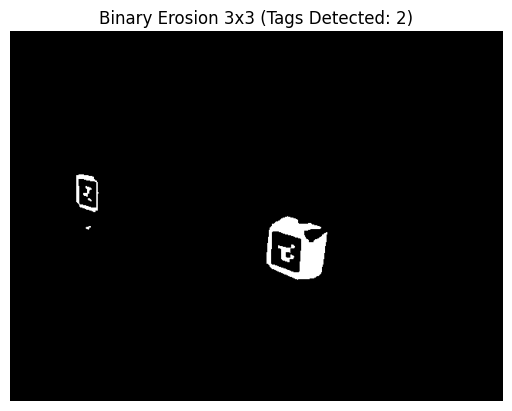

In [14]:
performance_results.append({
    "Method": "Binary Erosion 3x3",
    "Execution Time (s)": elapsed_time,
    "AprilTags Detected": tag_count
})

# Show binary erosion result
show_image(binary_eroded_image, title=f"Binary Erosion 3x3 (Tags Detected: {tag_count})")


In [15]:
print("\nFinal Performance Results:")
for result in performance_results:
    print(result)


Final Performance Results:
{'Method': 'Square 3x3', 'Execution Time (s)': 0.002864837646484375, 'AprilTags Detected': 1}
{'Method': 'Square 5x5', 'Execution Time (s)': 0.0028188228607177734, 'AprilTags Detected': 1}
{'Method': 'Disk 3', 'Execution Time (s)': 0.009453535079956055, 'AprilTags Detected': 0}
{'Method': 'Disk 5', 'Execution Time (s)': 0.029102325439453125, 'AprilTags Detected': 0}
{'Method': 'Binary Erosion 3x3', 'Execution Time (s)': 0.0026481151580810547, 'AprilTags Detected': 2}


In [16]:
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)

# Define structuring elements and sizes for performance tests
erosion_methods = {
    "Square 3x3": square(3),
    "Square 5x5": square(5),
    "Disk 3": disk(3),
    "Disk 7": disk(7),
    "Binary Erosion 3x3": None  # Special case for binary erosion
}

In [18]:
folder_path = 'samples/'
frame_count = 16
frame_template = "frame{}.png"

performance_results = []

In [19]:
for i in range(1, frame_count + 1):
    # Load and preprocess image
    image_path = os.path.join(folder_path, frame_template.format(i))
    image = ski.io.imread(image_path)
    image = ski.color.rgb2gray(image)
    
    # Loop through each erosion method
    for method_name, struct_elem in erosion_methods.items():
        # Binary erosion requires a binary image
        if "Binary" in method_name:
            binary_image = image > 0.5  # threshold for binary conversion
            start_time = time.time()
            eroded_image = binary_erosion(binary_image, square(3))
        else:
            # Standard erosion
            start_time = time.time()
            eroded_image = erosion(image, struct_elem)
        
        elapsed_time = time.time() - start_time

        # Run AprilTag detection on eroded image
        tag_count = detect_apriltags(eroded_image, detector)

        # Measure change in mean pixel intensity as an erosion effect indicator
        intensity_change = np.abs(np.mean(image) - np.mean(eroded_image))
        
        # Store results for this method and frame
        performance_results.append({
            "Frame": i,
            "Method": method_name,
            "Execution Time (s)": elapsed_time,
            "AprilTags Detected": tag_count,
            "Intensity Change": intensity_change
        })

Execution Time: How long each erosion operation takes.

AprilTags Detected: Number of AprilTags detected.

Pixel Intensity Change: Measure the change in mean pixel intensity as a rough indicator of how much the erosion process alters the image

In [20]:
print("\nFinal Performance Results (Summary):")
for result in performance_results:
    print(result)


Final Performance Results (Summary):
{'Frame': 1, 'Method': 'Square 3x3', 'Execution Time (s)': 0.004235506057739258, 'AprilTags Detected': 2, 'Intensity Change': 0.00490305383348651}
{'Frame': 1, 'Method': 'Square 5x5', 'Execution Time (s)': 0.006514549255371094, 'AprilTags Detected': 2, 'Intensity Change': 0.009210678926674834}
{'Frame': 1, 'Method': 'Disk 3', 'Execution Time (s)': 0.019469499588012695, 'AprilTags Detected': 2, 'Intensity Change': 0.011183523981311276}
{'Frame': 1, 'Method': 'Disk 7', 'Execution Time (s)': 0.05202078819274902, 'AprilTags Detected': 0, 'Intensity Change': 0.022103257061887253}
{'Frame': 1, 'Method': 'Binary Erosion 3x3', 'Execution Time (s)': 0.0015938282012939453, 'AprilTags Detected': 2, 'Intensity Change': 0.0062460682993770375}
{'Frame': 2, 'Method': 'Square 3x3', 'Execution Time (s)': 0.0026776790618896484, 'AprilTags Detected': 2, 'Intensity Change': 0.004062965208843954}
{'Frame': 2, 'Method': 'Square 5x5', 'Execution Time (s)': 0.002874374389

In [24]:
from skimage.filters import sobel

In [27]:
performance_results.clear()

In [28]:
for i in range(1, frame_count + 1):
    # Load and preprocess image
    image_path = os.path.join(folder_path, frame_template.format(i))
    image = ski.io.imread(image_path)
    image = ski.color.rgb2gray(image)
    
    # Loop through each erosion method
    for method_name, struct_elem in erosion_methods.items():
        # Binary erosion requires a binary image
        if "Binary" in method_name:
            binary_image = image > 0.5  # threshold for binary conversion
            start_time = time.time()
            eroded_image = binary_erosion(binary_image, square(3))
        else:
            # Standard erosion
            start_time = time.time()
            eroded_image = erosion(image, struct_elem)
        
        elapsed_time = time.time() - start_time

        # Run AprilTag detection on eroded image
        tag_count = detect_apriltags(eroded_image, detector)

        # Measure change in mean pixel intensity as an erosion effect indicator
        intensity_change = np.abs(np.mean(image) - np.mean(eroded_image))
        
        # Calculate edge preservation score
        edge_score = edge_preservation_score(image, eroded_image)
        
        # Calculate contrast loss
        contrast_change = contrast_loss(image, eroded_image)
        
        # Store results for this method and frame
        performance_results.append({
            "Frame": i,
            "Method": method_name,
            "Execution Time (s)": elapsed_time,
            "AprilTags Detected": tag_count,
            "Intensity Change": intensity_change,
            "Edge Preservation Score": edge_score,
            "Contrast Loss": contrast_change
        })

In [29]:
print("\nFinal Performance Results (Summary):")
for result in performance_results:
    print(result)


Final Performance Results (Summary):
{'Frame': 1, 'Method': 'Square 3x3', 'Execution Time (s)': 0.004704952239990234, 'AprilTags Detected': 2, 'Intensity Change': 0.00490305383348651, 'Edge Preservation Score': 262.23690377193634, 'Contrast Loss': 0.014528018749674604}
{'Frame': 1, 'Method': 'Square 5x5', 'Execution Time (s)': 0.002878904342651367, 'AprilTags Detected': 2, 'Intensity Change': 0.009210678926674834, 'Edge Preservation Score': 605.7572982231424, 'Contrast Loss': 0.02851223398968447}
{'Frame': 1, 'Method': 'Disk 3', 'Execution Time (s)': 0.010679483413696289, 'AprilTags Detected': 2, 'Intensity Change': 0.011183523981311276, 'Edge Preservation Score': 657.8135972821028, 'Contrast Loss': 0.035746815703816895}
{'Frame': 1, 'Method': 'Disk 7', 'Execution Time (s)': 0.0576784610748291, 'AprilTags Detected': 0, 'Intensity Change': 0.022103257061887253, 'Edge Preservation Score': 490.68355561745676, 'Contrast Loss': 0.08447336599918005}
{'Frame': 1, 'Method': 'Binary Erosion 3x

Execution Time: Time taken to execute each morphological method.

AprilTags Detected: The number of AprilTags detected post-processing, indicating feature preservation.

Intensity Change: Average change in intensity values, reflecting how much the method modifies pixel brightness.

Edge Preservation Score: Ability of each method to maintain edge information, crucial for structure-sensitive tasks.

Contrast Loss: Variation in image contrast post-processing, showing effects on overall visual clarity

Detection Rate of AprilTags:

Binary Erosion 3x3 and Square 3x3 stand out with consistently high AprilTag detection rates across frames (usually 1-2 tags detected per frame).
Disk 7 consistently underperformed, often detecting 0 tags, suggesting it may blur or alter image details too significantly for reliable tag detection.
Square 5x5 shows variable detection performance, with some frames detecting 1-2 tags and others detecting fewer, possibly due to moderate smoothing effects.

Execution Time:

Binary Erosion 3x3 and Square 3x3 are generally the fastest methods, typically below 0.002 seconds. This efficiency could make them suitable for real-time applications.
Disk 7 is the slowest method, with execution times averaging around 0.045-0.057 seconds, which might be too slow for time-sensitive processing.
Disk 3 has intermediate execution times but is still slower than the square-shaped filters and binary erosion.

Intensity Change:

Square 3x3 and Binary Erosion 3x3 consistently have low intensity changes, indicating minimal alteration of pixel values, which could be favorable for maintaining image detail.
Disk 7 has the highest intensity changes, sometimes reaching above 0.05, suggesting significant smoothing or blurring. This higher change may contribute to its poor detection performance.
Disk 3 shows moderate intensity changes, suggesting it is more disruptive than square-based filters but less so than Disk 7.

Edge Preservation Score:

Binary Erosion 3x3 consistently achieves the highest edge preservation scores, often exceeding 800 and sometimes over 1000. This suggests it maintains edge detail well, which may contribute to its high detection rates.
Square 5x5 generally has higher edge preservation scores than Square 3x3, indicating it could balance preservation and minor smoothing.
Disk 7 has fluctuating and lower edge preservation scores, likely due to aggressive smoothing.

Contrast Loss:

Binary Erosion 3x3 uniquely exhibits negative contrast loss, indicating contrast enhancement rather than reduction. This enhancement might contribute to its high edge preservation and tag detection.
Square 3x3 and Square 5x5 show minimal contrast loss (around 0.01 to 0.03), suggesting they preserve contrast relatively well without introducing enhancement or significant degradation.
Disk 7 displays high contrast loss values (up to 0.08), indicating it reduces contrast significantly, which aligns with its high intensity change and low detection performance.